In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('weight-height.csv')
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df_height_all = df.Height
df_height_male = df.loc[df.Gender == 'Male', 'Height']
df_height_female = df.loc[df.Gender == 'Female', 'Height']

df_weight_all = df.Weight
df_weight_male = df.loc[df.Gender == 'Male', 'Weight']
df_weight_female = df.loc[df.Gender == 'Female', 'Weight']

In [5]:
dict_dfs = {
    'Height All': df_height_all,
    'Height Male': df_height_male,
    'Height Female': df_height_female,
    'Weight All': df_weight_all,
    'Weight Male': df_weight_male,
    'Weight Female': df_weight_female
}

In [6]:
class Kernel_Density:
    def __init__(self, kernel='gaussian', bandwidth=0.2):
        self.kernel = kernel
        self.h = bandwidth

    def fit(self, X):
        self.X = X
        self.N = X.shape[0]
        self.D = X.shape[1] 
    
        return self

    def estimator(self, X):       
        pdfs = np.zeros(X.shape[0])
        for i in range(pdfs.shape[0]):
            sigma = 0
            for xn in self.X:
                sigma += self.gaussian_kernel((X[i] - xn) / self.h)

            pdfs[i] = sigma / (self.N * np.power(self.h, self.D))

        return pdfs

    def gaussian_kernel(self, x):
        return np.power(2*np.pi, - self.D/2) * np.exp(-np.dot(x.T, x) / 2)
    
    def kernel_pdf(self, x):
        pdf = (1/self.N) * np.sum(
            np.power(2*np.pi*self.h**2, - self.D/2) * 
            np.exp(-((x - self.X)**2) / (2*(self.h**2))))

        return pdf

50 0.1
50 0.8


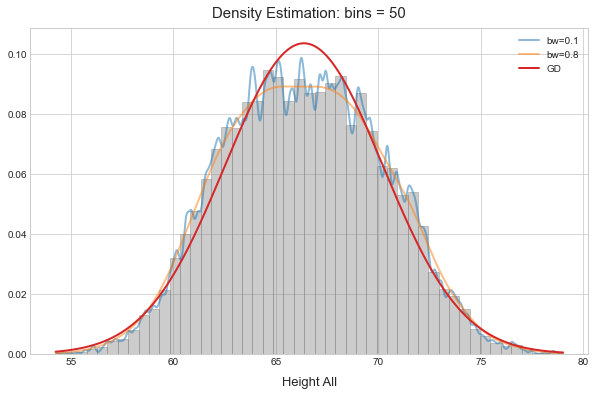

100 0.1
100 0.8


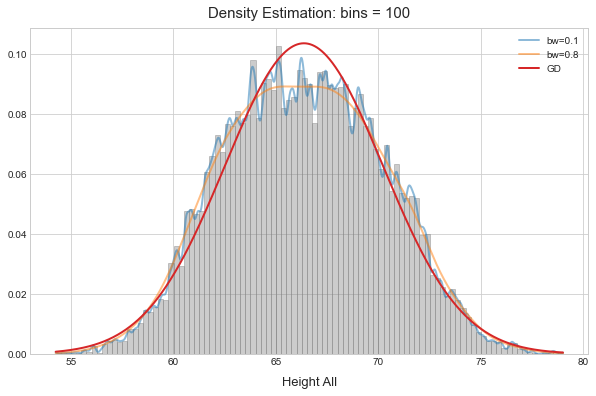

200 0.1
200 0.8


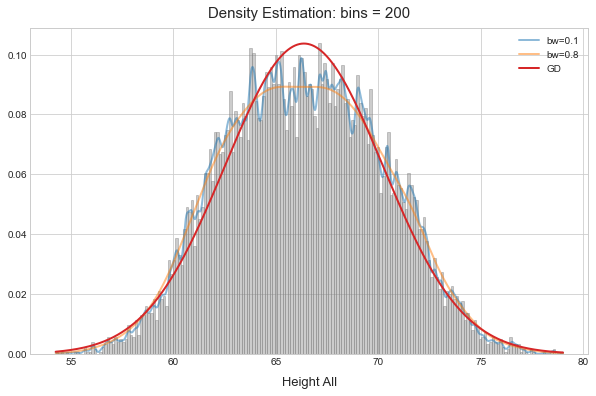

300 0.1
300 0.8


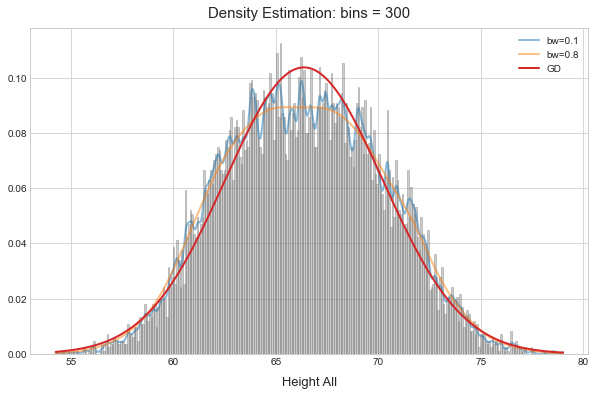

50 0.1


ValueError: x and y must have same first dimension, but have shapes (5000,) and (10000,)

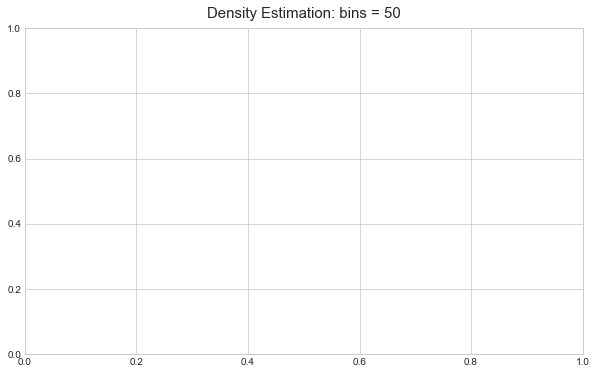

In [11]:
bin_counts = [50, 100, 200, 300]
bandwidths = [0.1, 0.8]
save_pdfs = True
check_pdfs = False

dict_pdfs = {}
for xlabel, df in dict_dfs.items():
    for bin_count in bin_counts:
        param = 'bins = {}'.format(bin_count)
        
        X = np.array(df).flatten()
        x_grid = np.linspace(min(X), max(X), len(X))
        mu = (1/len(X)) * np.sum(X)
        sigma = np.sqrt((1/len(X)) * np.sum((X-mu)**2))
        MLE = np.power(2*np.pi*sigma**2, - 1/2) * np.exp(-(x_grid-mu)**2 / (2*sigma**2))

        plt.figure(figsize=(10, 6))    
        plt.title('Density Estimation: ' + param, pad=10, fontsize=15)

        for bw in bandwidths:
            print(bin_count, bw)
            if save_pdfs:
                kde = Kernel_Density(bandwidth=bw).fit(X[:, np.newaxis])
                pdfs = kde.estimator(x_grid[:, np.newaxis]) # same with [kde.kernel_pdf(x) for x in x_grid]

                dict_pdfs[bw] = pdfs
            
            if check_pdfs:
                print('kde smoothing: {}'.format(pdfs))
                print('log-likelihood: {}'.format(np.log(pdfs)))

            # Kernel Density Estimation
            plt.plot(x_grid, dict_pdfs[bw], label='bw={0}'.format(bw), alpha=0.5, linewidth=2)
        
        save_pdfs = False
        # Histogram
        plt.hist(X, bins=np.linspace(X.min(), X.max(), bin_count), 
                 density=True, ec='gray', fc='gray', alpha=0.4)
        # Gaussian Distribution with MLE
        plt.plot(x_grid, MLE, linewidth=2, label='GD') 
        plt.xlabel(xlabel, labelpad=10, fontsize=13)
        plt.legend(loc='best')
        plt.show()

In [409]:
def plot_hist(x, xlabel, bin_cnt):
    cm = plt.cm.get_cmap('RdYlBu_r')
    plt.figure(figsize=(10, 6))
    
    bins = np.linspace(x.min(), x.max(), bin_cnt) #  bin width
    n, _, patches = plt.hist(x, bins=bins,
                              edgecolor='black', linewidth=0.5, density=True)

    col = (n-n.min()) / (n.max()-n.min())
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
        
    plt.xlabel(xlabel, labelpad=10, fontsize=13)
    
    return (bins[1] - bins[0]).round(2)

In [395]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], 
              [1, 1], [2, 1], [3, 2]]).reshape(-1, 1)

kde = Kernel_Density().fit(X)
scores = kde.estimator(X)

print(scores)
print(np.log(scores))

[0.49867909 0.49867909 0.33245438 0.49867909 0.16622719 0.33245438
 0.49867909 0.49867909 0.33245438 0.49867909 0.16622719 0.33245438]
[-0.6957925  -0.6957925  -1.10125264 -0.6957925  -1.79439982 -1.10125264
 -0.6957925  -0.6957925  -1.10125264 -0.6957925  -1.79439982 -1.10125264]


[0.07283383871888631, 0.33202343762671227, 0.19069529807134733, 0.03725256017424591, 0.2134139068695972, 0.1538485296875703, 2.4455311788457693e-11, 1.4357956204991906e-38, 3.1135164009991028e-83, 2.4937264092107184e-145]
[  -2.61957461   -1.10254972   -1.65707842   -3.29003461   -1.54452177
   -1.87178673  -24.43417367  -87.1365144  -189.97880996 -332.96106034]


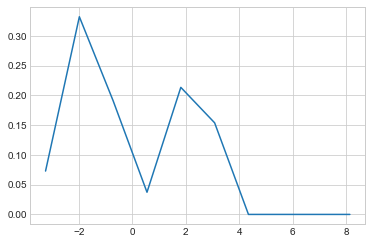

In [396]:
xvals = np.linspace(min(data), max(data), 10)
pdf = [kde.kernel_pdf(x) for x in xvals]
print(pdf)
print(np.log(pdf))
plt.plot(xvals, pdf)

[-0.6957925  -0.6957925  -1.10125264 -0.6957925  -1.79439982 -1.10125264
 -0.6957925  -0.6957925  -1.10125264 -0.6957925  -1.79439982 -1.10125264]


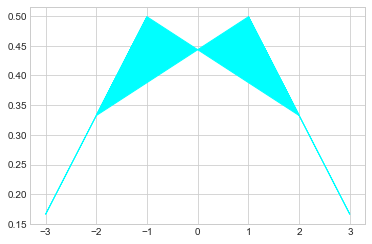

In [397]:
pdf = [kde.kernel_pdf(x) for x in X]
print(np.log(pdf))
plt.fill(X, pdf, c='cyan')

In [291]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_scipy, kde_sklearn]
kde_funcnames = ['Scipy', 'Scikit-learn']

In [398]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

Text(0.5, 1.0, 'Mine')

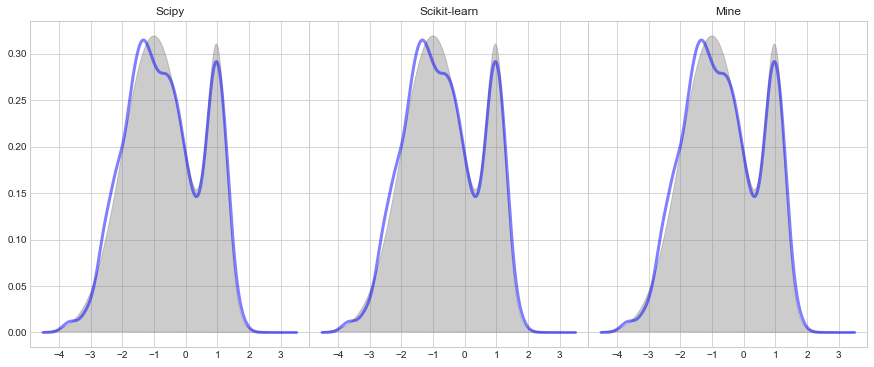

In [394]:
# Plot the three kernel density estimates
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 6))
fig.subplots_adjust(wspace=0)

for i in range(2):
    pdf = kde_funcs[i](x, x_grid, bandwidth=0.2)
    ax[i].plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
    ax[i].fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
    ax[i].set_title(kde_funcnames[i])
    
bandwidth = 0.2
check_pdfs = False

kde = Kernel_Density().fit(x[:, np.newaxis])
pdfs = kde.estimator(x_grid[:, np.newaxis]) # same with [kde.kernel_pdf(x) for x in xvals]
if check_pdfs:
    print('kde smoothing: {}'.format(pdfs))
    print('log-likelihood: {}'.format(np.log(pdfs)))

ax[2].plot(x_grid, pdfs, color='blue', alpha=0.5, lw=3)
ax[2].fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
ax[2].set_title('Mine')